In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.shape

(400, 5)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
list(df)

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

In [6]:
df.drop(['User ID'], axis = 1, inplace = True)

In [7]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [9]:
df.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [10]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [11]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

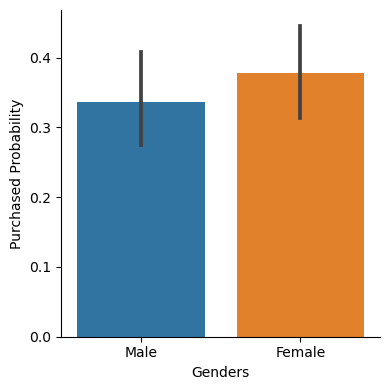

In [13]:
#Now Plotting
g = sns.catplot(x = "Gender", y = "Purchased", data = df, kind = "bar", height = 4)
g.set_ylabels("Purchased Probability")
g.set_xlabels("Genders")
plt.show

Purchased         0         1
Gender                       
Female     0.622549  0.377451
Male       0.663265  0.336735


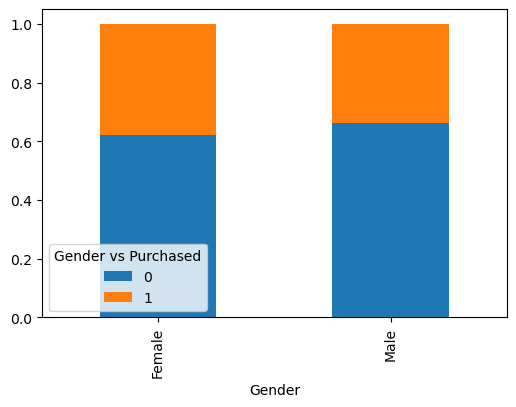

In [14]:
#Percentage of Male and Females that Bought or didnt Bought
p = pd.crosstab(df.Gender, df.Purchased, normalize = "index")
print(p)
p.plot.bar(figsize = (6,4), stacked = True)
plt.legend(title = "Gender vs Purchased", loc = "lower left")
plt.show()

In [15]:
dummy = pd.get_dummies(df["Gender"])
dummy

,Female,Male
0,False,True
1,False,True
2,True,False
3,True,False
4,False,True
...,...,...
395,True,False
396,False,True
397,True,False
398,False,True


In [16]:
dummy = pd.get_dummies(df["Gender"], dtype = int)
dummy

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [17]:
df = pd.concat([df, dummy], axis = 1)

In [18]:
df

,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0
3,Female,27,57000,0,1,0
4,Male,19,76000,0,0,1
...,...,...,...,...,...,...
395,Female,46,41000,1,1,0
396,Male,51,23000,1,0,1
397,Female,50,20000,1,1,0
398,Male,36,33000,0,0,1


In [19]:
df.drop("Gender", axis = 1, inplace = True)

In [20]:
df

,Age,EstimatedSalary,Purchased,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


                      Age  EstimatedSalary  Purchased    Female      Male
Age              1.000000         0.155238   0.622454  0.073741 -0.073741
EstimatedSalary  0.155238         1.000000   0.362083  0.060435 -0.060435
Purchased        0.622454         0.362083   1.000000  0.042469 -0.042469
Female           0.073741         0.060435   0.042469  1.000000 -1.000000
Male            -0.073741        -0.060435  -0.042469 -1.000000  1.000000 (5, 5)


<Axes: >

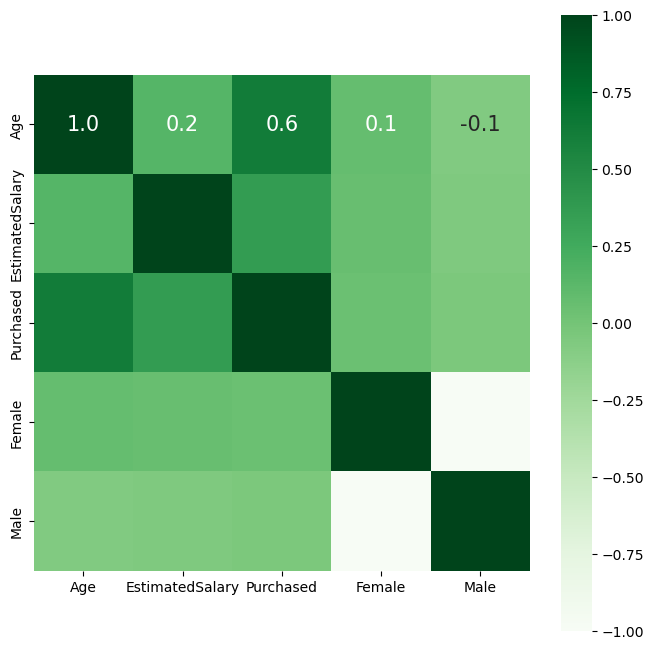

In [21]:
corr = df.corr()
print(corr, corr.shape)
plt.figure(figsize = (8,8))
sns.heatmap(corr, cbar = True, square = True, fmt = '1.1f', annot = True, annot_kws={'size':15}, cmap = 'Greens')

In [22]:
X= df.drop(['Male','Female','Purchased'], axis=1)
Y= df['Purchased']
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [23]:
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [24]:
from sklearn.linear_model import LogisticRegression
basemodel= LogisticRegression()
basemodel.fit(X_train,y_train)
print("Training accuracy:", basemodel.score(X_train,y_train)*100)

Training accuracy: 64.0625


In [25]:
y_predict= basemodel.predict(X_test)
print("Testing accuracy:", basemodel.score(X_test,y_test)*100)

Testing accuracy: 65.0


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [27]:
X=df[['Age','EstimatedSalary']]
X_scaled= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state = 42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [28]:
model= LogisticRegression()
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
print("Training accuracy:", model.score(X_train,y_train)*100)
print("Testing accuracy:", model.score(X_test,y_test)*100)

Training accuracy: 80.9375
Testing accuracy: 87.5


In [29]:
#Measures of Accuracy

from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_test,y_predict)
print(Acc)

0.875


In [30]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predict)
print(cm)

[[51  1]
 [ 9 19]]


In [31]:
from sklearn.metrics import precision_recall_fscore_support
prf= precision_recall_fscore_support(y_test,y_predict)
print('precision:',prf[0])
print('Recall:',prf[1])
print('fscore:',prf[2])
print('support:',prf[3])

precision: [0.85 0.95]
Recall: [0.98076923 0.67857143]
fscore: [0.91071429 0.79166667]
support: [52 28]


In [32]:
from sklearn.metrics import classification_report
cr= classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.95      0.68      0.79        28

    accuracy                           0.88        80
   macro avg       0.90      0.83      0.85        80
weighted avg       0.89      0.88      0.87        80

